<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/019_benchmark_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.25 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting Benchmark - Results (2018-2022)**

### Contents

##### 1. Input Data
##### 6. Predicting and Evaluation*

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Benchmark
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%

##### 9. Best and Worst Model*
*  Benchmark 預測最好和最差的模型組合


## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00


In [4]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [5]:
from MonRevForecast import back_month, month_range, evaluatePerformance, savePerformace

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00


In [7]:
from MonRevPlot import plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [8]:
from MonRevPlot import plotModelScore, modelScoreBoxplotV

### **Project Path**

In [9]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [10]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [11]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


## **6. Predicting and Evaluation**

衡量指標：

*   RMSE (Root Mean Square Error)

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$$

<br>

*   MAE (Mean Absolute Error)

$$MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$$

<br>

*   MAE% (MAE / mean of the sum of y_true)

$$MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$$

<br>

*   MAPE (Mean Absolute Percentage Error)

$$MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$$

<br>


In [12]:
def calculateBenchmark(data: pd.DataFrame, yr: int, mon: int):
    '''
    Calculate the benchmark by the average growth rate.

    Parameters
    ----------
    yr: 第t期的年, mon: 第t期的月
    '''
    # t = f"{yr}-{mon}"
    t_1 = back_month(yr, mon, 1)
    t_2 = back_month(yr, mon, 2)
    t_12 = back_month(yr, mon, 12)
    t_13 = back_month(yr, mon, 13)

    growth_current = (data[t_1] - data[t_2]) / data[t_2]
    growth_last_year = (data[t_12] - data[t_13]) / data[t_13]
    avg_growth = (growth_current + growth_last_year) / 2

    # benchmark = pd.DataFrame(index = data.index)
    # benchmark[t] = np.round(data[t_1]*(1 + avg_growth), 0)
    benchmark = data[t_1]*(1 + avg_growth)

    return benchmark


In [13]:
import time

# 計算所有預測年月的 benchmark
def predictBenchmark(data: pd.DataFrame, y_test_start_yr: int, y_test_start_mon: int, y_test_end_yr: int, y_test_end_mon: int):
    '''
    Calculate benchmarks for all test months."
    
    Parameters
    ----------    
    data: 資料集, 
    y_test_start_yr: 預測起始年, y_test_start_mon: 預測起始月, 
    y_test_end_yr: 預測終止年, y_test_end_mon: 預測終止月, 
    '''

    test_y_m = month_range(y_test_start_yr, y_test_start_mon, y_test_end_yr, y_test_end_mon)  # 所有要預測的年月
    benchmark_pred = pd.DataFrame(index=data.index.tolist())          # 紀錄原始資料的預測值

    # 紀錄原始資料的預測分數
    rmse_list = []
    mae_list = []
    mae_percent_list = []
    mape_list = []

    # 彙整所有預測分數
    scores = pd.DataFrame(index=test_y_m)


    # 針對每個欲預測的年月
    for i in test_y_m:
        start = time.time()

        y_test_yr = int(i.split("-")[0])    # 預測的年
        y_test_mon = int(i.split("-")[1])   # 預測的月

        #-----------------------計算預測年月的 benchmark-----------------------
        benchmark_pred[i] = np.round(calculateBenchmark(data, y_test_yr, y_test_mon), 0) 
        
        #-----------------------儲存預測分數-----------------------
        evaluatePerformance(data[i], benchmark_pred[i], rmse_list, mae_list, mae_percent_list, mape_list)


    # 彙整不同衡量指標的預測分數
    savePerformace(scores, rmse_list, mae_list, mae_percent_list, mape_list, 'benchmark')

    print("Using time:", "%.3f"%(time.time() - start), " secs.")

    return benchmark_pred, scores

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [14]:
# 訓練資料起始年
file_category = 'benchmark'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, pred: dict):
    pred.to_excel(os.path.join(output_data_path, f'{category}/{category}_{start_y - 5}.xlsx'))

def outputScores(category: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{category}_{start_y - 5}.xlsx'))

### **7.2 Benchmark**

In [15]:
pred_benchmark, scores_benchmark = predictBenchmark(org_data, start_y, start_m, end_y, end_m)

Using time: 0.004  secs.


In [ ]:
# Output
outputPredictingResults(file_category, pred_benchmark)
outputScores(file_category, scores_benchmark)

#### **7.2.1 Predicting Results**

In [ ]:
print(pred_benchmark.shape)
pred_benchmark.head(4)

(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,9622241.0,8886799.0,4867125.0,14371184.0,11818632.0,11384358.0,10513316.0,10403270.0,11419586.0,10508567.0,...,7860455.0,14043197.0,7699167.0,6929943.0,9894292.0,11022014.0,11378245.0,10248464.0,12005781.0,9483968.0
1102 亞泥,6207668.0,5721142.0,3825107.0,9143000.0,7993983.0,7696287.0,7421088.0,6926537.0,7476822.0,8007005.0,...,5296798.0,12679864.0,8924701.0,7261688.0,7431913.0,8343661.0,7025342.0,7681690.0,7742451.0,8884452.0
1103 嘉泥,145191.0,145196.0,117079.0,179228.0,202260.0,173682.0,173098.0,156604.0,185949.0,157819.0,...,151082.0,281384.0,153194.0,149790.0,207335.0,164209.0,203558.0,213985.0,214065.0,213573.0
1104 環泥,366261.0,460307.0,264322.0,539832.0,374674.0,413801.0,323016.0,362523.0,374239.0,416861.0,...,385327.0,771690.0,670049.0,430700.0,653153.0,547419.0,686722.0,610388.0,674026.0,618173.0


### **7.4 Scores**

In [16]:
scores_benchmark

,RMSE-benchmark,MAE-benchmark,MAE%-benchmark,MAPE-benchmark
2018-01,21579349.0,1024039.0,0.5257,0.4851
2018-02,2070650.0,374468.0,0.2513,0.5528
2018-03,3073875.0,447286.0,0.2382,0.3284
2018-04,1974340.0,351256.0,0.1958,0.4145
2018-05,1258827.0,205134.0,0.1083,0.1710
2018-06,1075555.0,211394.0,0.1104,0.3141
2018-07,1456787.0,213870.0,0.1087,0.2270
2018-08,905471.0,162810.0,0.0791,0.8172
2018-09,3031153.0,241857.0,0.1083,0.2256
2018-10,4691387.0,325551.0,0.1422,0.2314


## **8. Plots**


### **8.1 Expected v.s. Predicted**

#### **8.1.2 分模型畫圖**

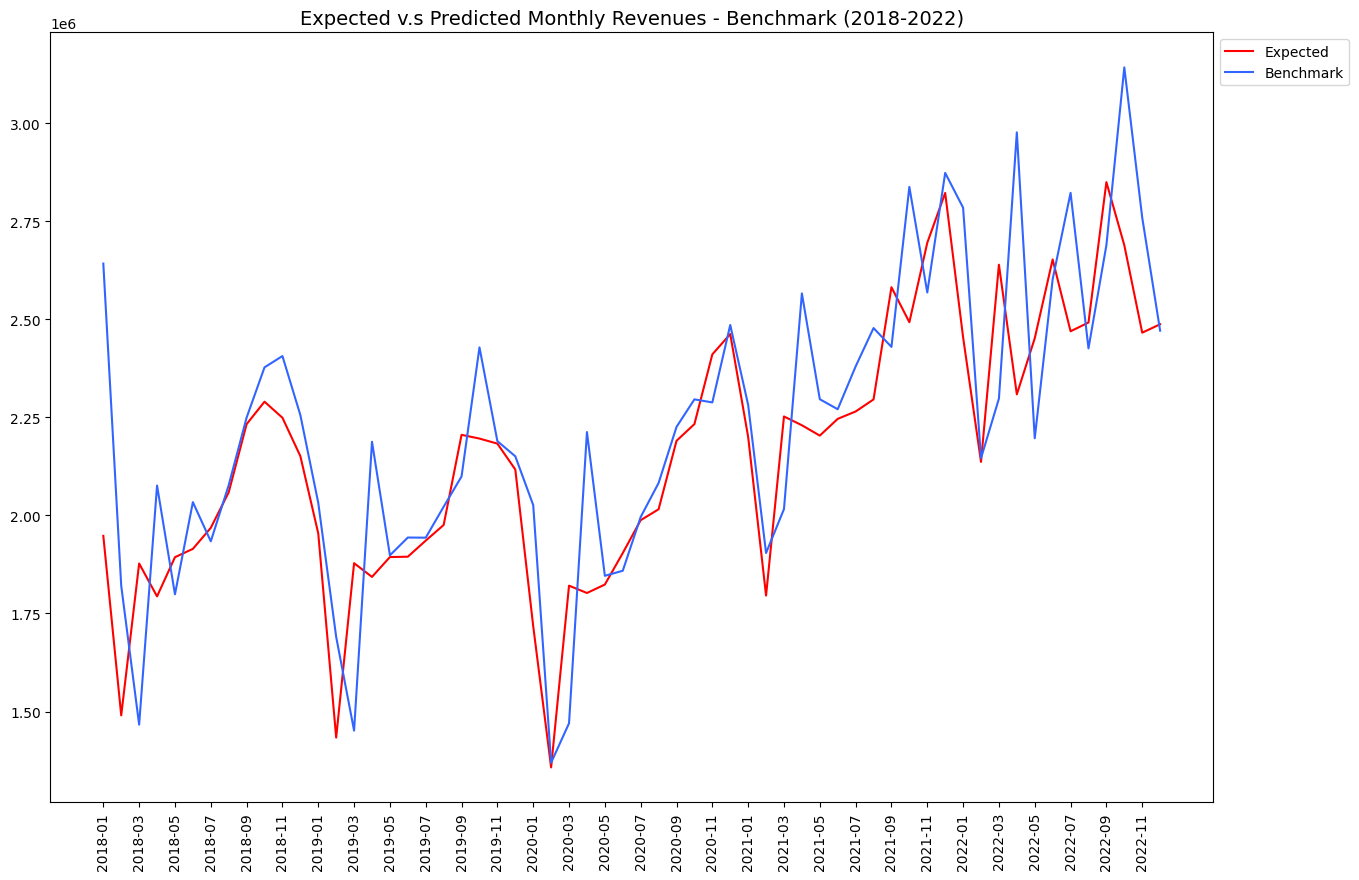

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_benchmark, 'benchmark', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.2 分模型畫圖**

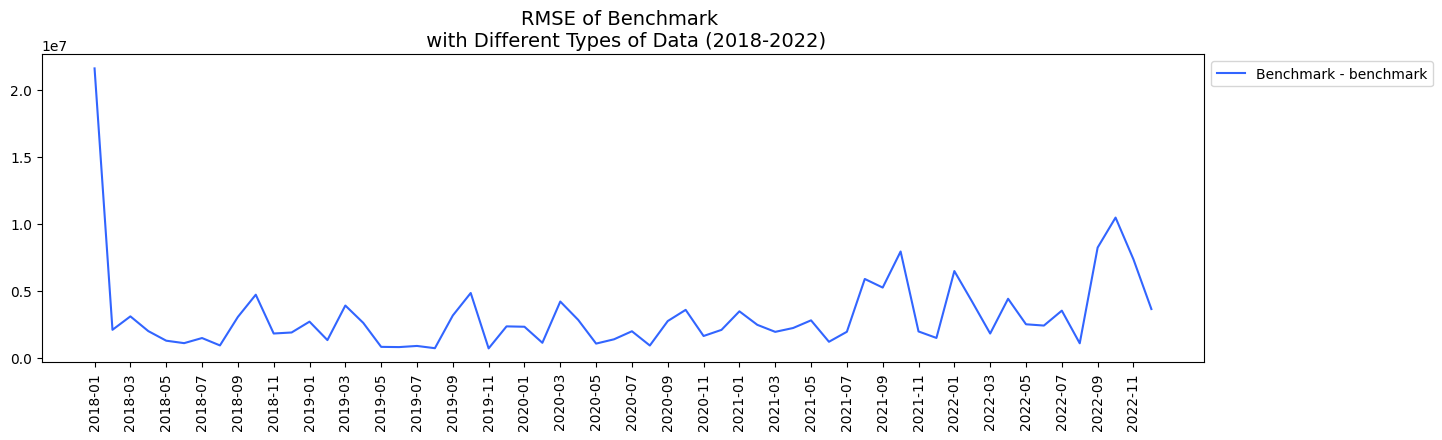

In [ ]:
# RMSE
plotModelScore(scores_benchmark, 'Benchmark', 'RMSE', start_y)

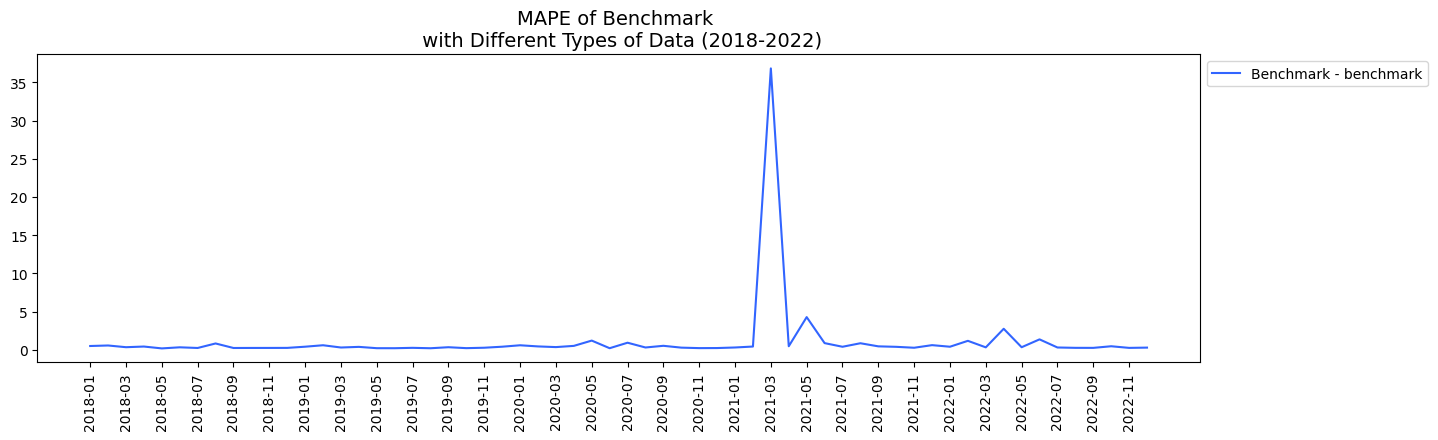

In [ ]:
# MAPE
plotModelScore(scores_benchmark, 'Benchmark', 'MAPE', start_y)

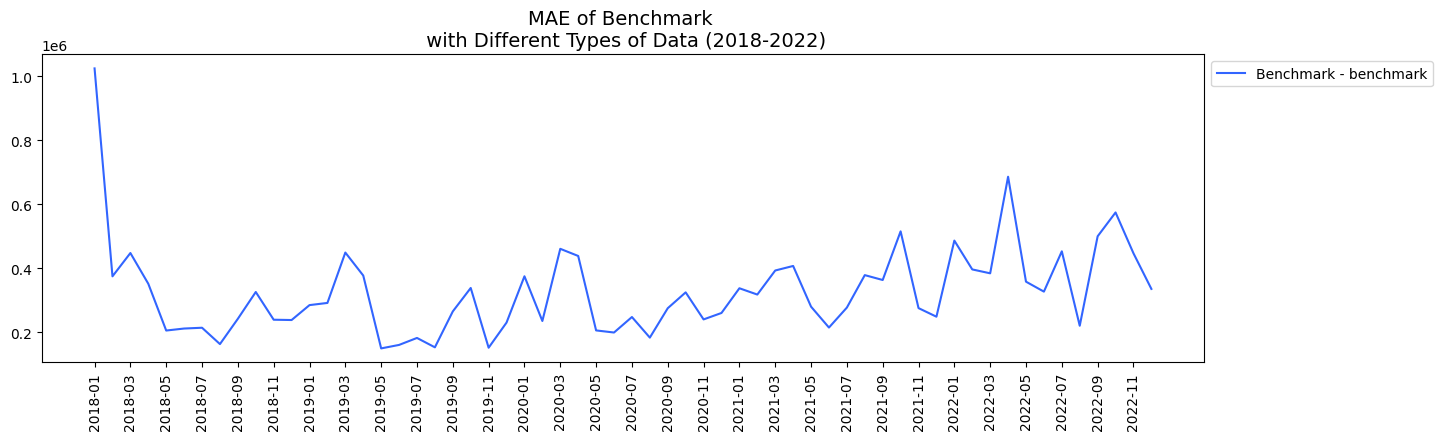

In [ ]:
# MAE
plotModelScore(scores_benchmark, 'Benchmark', 'MAE', start_y)

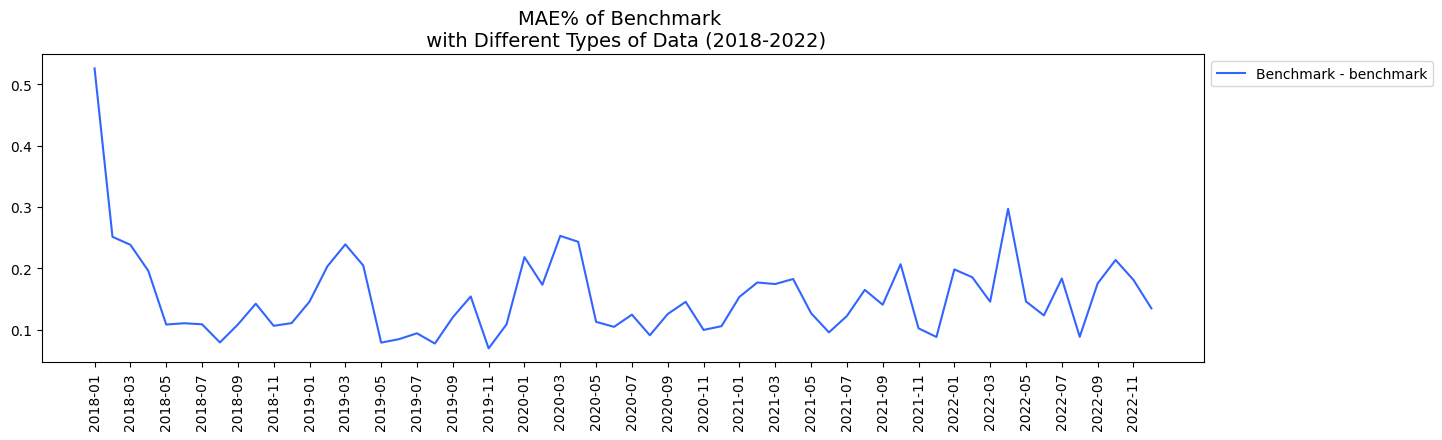

In [ ]:
# MAE%
plotModelScore(scores_benchmark, 'Benchmark', 'MAE%', start_y)

#### **8.2.3 Boxplot**

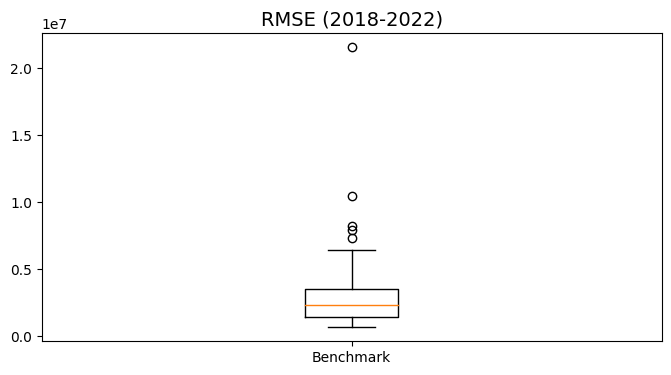

In [ ]:
# RMSE
modelScoreBoxplotV(scores_benchmark, 'RMSE', start_y, benchmark = True) 

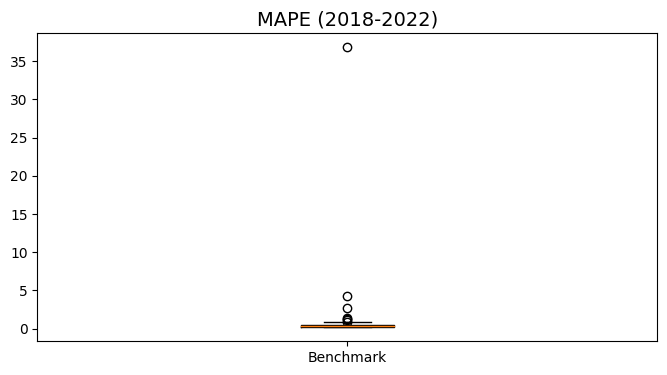

In [ ]:
# MAPE
modelScoreBoxplotV(scores_benchmark, 'MAPE', start_y, benchmark = True) 

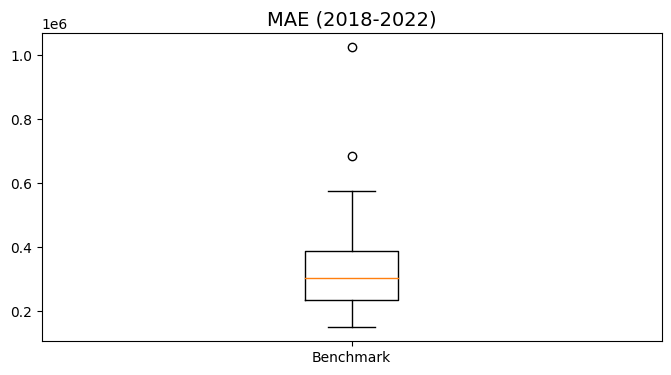

In [ ]:
# MAE
modelScoreBoxplotV(scores_benchmark, 'MAE', start_y, benchmark = True) 

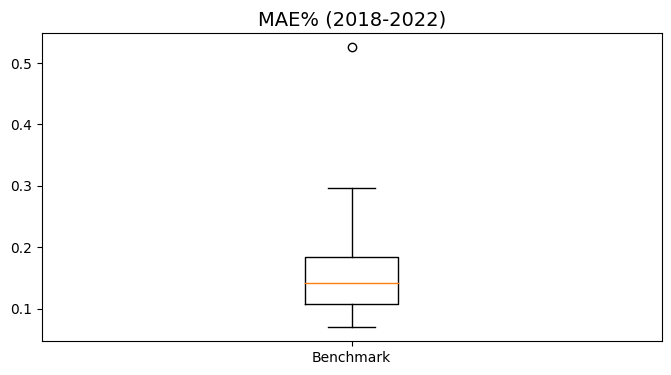

In [ ]:
# MAE%
modelScoreBoxplotV(scores_benchmark, 'MAE%', start_y, benchmark = True) 

## **9. Best and Worst Model**

2023.06.12

In [ ]:
def findBestWorstForBenchmark(scoreD: pd.DataFrame, scoreType: str, best_or_worst: str):
    if best_or_worst == 'best':
        min_score = scoreD[f'{scoreType}-benchmark'].min()
        min_month = scoreD[f'{scoreType}-benchmark'].idxmin()
        df = pd.DataFrame({'modelName': ['Benchmark'],
                           'scoreType': [scoreType],
                           'min_month': [min_month],
                           'min_score': [min_score]})
        
    elif best_or_worst == 'worst':
        max_score = scoreD[f'{scoreType}-benchmark'].max()
        max_month = scoreD[f'{scoreType}-benchmark'].idxmax()
        df = pd.DataFrame({'modelName': ['Benchmark'],
                           'scoreType': [scoreType],
                           'min_month': [max_month],
                           'min_score': [max_score]})

    return df

### **9.2 Benchmark 預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|

#### **9.2.1 RMSE**

##### **最佳模型**

In [21]:
findBestWorstForBenchmark(scores_benchmark, 'RMSE', 'best')

,modelName,scoreType,min_month,min_score
0,Benchmark,RMSE,2019-11,683369.0


##### **最差模型**

In [22]:
findBestWorstForBenchmark(scores_benchmark, 'RMSE', 'worst')

,modelName,scoreType,min_month,min_score
0,Benchmark,RMSE,2018-01,21579349.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [23]:
findBestWorstForBenchmark(scores_benchmark, 'MAPE', 'best')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAPE,2018-05,0.171


##### **最差模型**

In [24]:
findBestWorstForBenchmark(scores_benchmark, 'MAPE', 'worst')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAPE,2021-03,36.8206


#### **9.2.3 MAE**

##### **最佳模型**

In [25]:
findBestWorstForBenchmark(scores_benchmark, 'MAE', 'best')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAE,2019-05,149319.0


##### **最差模型**

In [26]:
findBestWorstForBenchmark(scores_benchmark, 'MAE', 'worst')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAE,2018-01,1024039.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [27]:
findBestWorstForBenchmark(scores_benchmark, 'MAE%', 'best')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAE%,2019-11,0.0694


##### **最差模型**

In [28]:
findBestWorstForBenchmark(scores_benchmark, 'MAE%', 'worst')

,modelName,scoreType,min_month,min_score
0,Benchmark,MAE%,2018-01,0.5257
